<a href="https://colab.research.google.com/github/pcpiscator/01T2021/blob/main/Petr4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carregamos aqui os módulos necessários.

In [ ]:
pip install mpl_finance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from mpl_finance import candlestick_ohlc
import time
from dateutil.parser import parse 
import sklearn

Carregamos aqui os dados de 1 ano de ações da Petrobras da página da ADVFN, estocadas no Github.

In [3]:
# leitura dos conjuntos de dados

petr4 = pd.read_csv('https://raw.githubusercontent.com/pcpiscator/Ciencia-de-dados/master/ACAO.txt', sep=',', encoding='UTF-8', low_memory=False) #

In [4]:
petr4.head(5)

,Data,Fechamento,Maxima,Minima
0,15/jun/20,20.71,21.09,19.54
1,16/jun/20,21.36,21.91,21.17
2,17/jun/20,21.45,21.85,21.15
3,18/jun/20,21.59,21.77,21.08
4,19/jun/20,21.30,22.22,21.22


In [5]:
petr4.shape

(251, 4)

In [6]:
petr4['Data']

0      15/jun/20
1      16/jun/20
2      17/jun/20
3      18/jun/20
4      19/jun/20
         ...    
246    24/Mai/21
247    25/Mai/21
248    26/Mai/21
249    27/Mai/21
250    28/Mai/21
Name: Data, Length: 251, dtype: object

In [7]:
petr4['Fechamento']

0      20.71
1      21.36
2      21.45
3      21.59
4      21.30
       ...  
246    26.35
247    25.88
248    26.07
249    25.91
250    27.00
Name: Fechamento, Length: 251, dtype: float64

In [8]:
petr4['Maxima']

0      21.09
1      21.91
2      21.85
3      21.77
4      22.22
       ...  
246    26.52
247    26.62
248    26.18
249    26.25
250    27.02
Name: Maxima, Length: 251, dtype: float64

In [9]:
petr4['Minima']

0      19.54
1      21.17
2      21.15
3      21.08
4      21.22
       ...  
246    25.99
247    25.78
248    25.65
249    25.77
250    26.15
Name: Minima, Length: 251, dtype: float64

In [10]:
petr4.columns.values

array(['Data', 'Fechamento', 'Maxima', 'Minima'], dtype=object)

In [11]:
petr4[["Data", "Fechamento"]]

,Data,Fechamento
0,15/jun/20,20.71
1,16/jun/20,21.36
2,17/jun/20,21.45
3,18/jun/20,21.59
4,19/jun/20,21.30
...,...,...
246,24/Mai/21,26.35
247,25/Mai/21,25.88
248,26/Mai/21,26.07
249,27/Mai/21,25.91


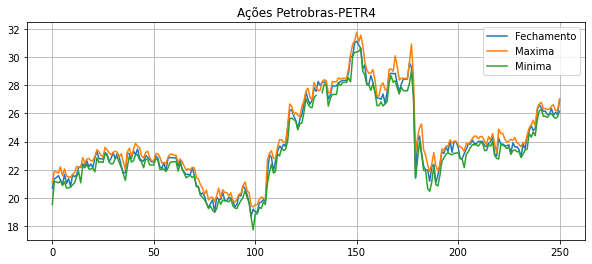

In [12]:
petr4.plot(figsize=(10, 4), title='Ações Petrobras-PETR4', grid=True)

In [13]:
petr4['MovingMean14'] = petr4.Fechamento.rolling(14).mean()  # Média movel de 14 dias do Fechamento
petr4['MovingMean30'] = petr4.Fechamento.rolling(30).mean()  # Média movel de 30 dias do Fechamento
petr4['DailyReturn'] = petr4.Fechamento.pct_change()              # Retorno diario percentual
petr4.tail()

,Data,Fechamento,Maxima,Minima,MovingMean14,MovingMean30,DailyReturn
246,24/Mai/21,26.35,26.52,25.99,25.520714,24.511333,0.015414
247,25/Mai/21,25.88,26.62,25.78,25.690714,24.562333,-0.017837
248,26/Mai/21,26.07,26.18,25.65,25.812857,24.661333,0.007342
249,27/Mai/21,25.91,26.25,25.77,25.895714,24.759000,-0.006137
250,28/Mai/21,27.00,27.02,26.15,26.028571,24.850667,0.042069


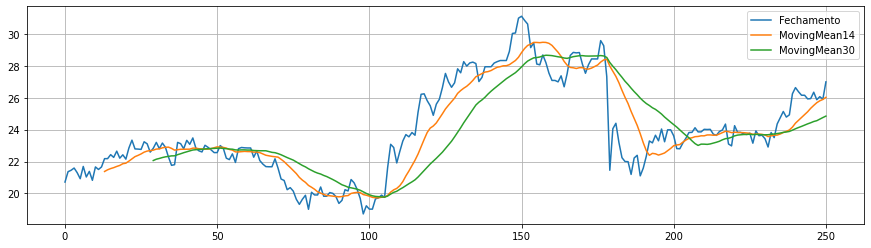

In [14]:
columns = ['Fechamento','MovingMean14', 'MovingMean30']
graph = petr4[columns].plot(figsize=(15, 4), grid=True)

Criamos um arquivo auxiliar, petr4M, com datas espaçadas para que possam aparecer no eixo x sem ficar emboladas e ilegíveis.

In [26]:
 petr4M= pd.read_csv('https://raw.githubusercontent.com/pcpiscator/Ciencia-de-dados/master/ACAO_M.csv', sep=';', encoding='UTF-8', low_memory=False) #


In [19]:
petr4M.head(5)

,Data,Fechamento,Maxima,Minima
0,15/jun/20,20.71,21.09,19.54
1,NaN,21.36,21.91,21.17
2,NaN,21.45,21.85,21.15
3,NaN,21.59,21.77,21.08
4,NaN,21.30,22.22,21.22


In [20]:
#Colocado como teste.# Valor = Retorno diario percentual
petr4M['MovingMean14'] = petr4.Fechamento.rolling(14).mean()  # Média movel de 14 dias do Fechamento
petr4M['MovingMean30'] = petr4.Fechamento.rolling(30).mean()  # Média movel de 30 dias do Fechamento
petr4M['DailyReturn'] = petr4.Fechamento.pct_change()# Retorno diario percentual
petr4M['Valor'] = petr4.Fechamento.pct_change(0)#  = Retorno diario percentual
petr4M.tail()

,Data,Fechamento,Maxima,Minima,MovingMean14,MovingMean30,DailyReturn,Valor
247,25/mai/21,25.88,26.62,25.78,25.690714,24.562333,-0.017837,0.0
248,26/mai/21,26.07,26.18,25.65,25.812857,24.661333,0.007342,0.0
249,27/mai/21,25.91,26.25,25.77,25.895714,24.759000,-0.006137,0.0
250,28/mai/21,27.00,27.02,26.15,26.028571,24.850667,0.042069,0.0
251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#petr4[['Data','Fechamento']].plot(figsize=(15, 4), title='Bovespa', grid=True)
#plt.figure(figsize= (15,8))
#sns.boxplot(x="Data", y= "Valor", data = petr4M)
#plt.title("Data X Valor")

Text(0.5, 1.0, 'Data X Valor')

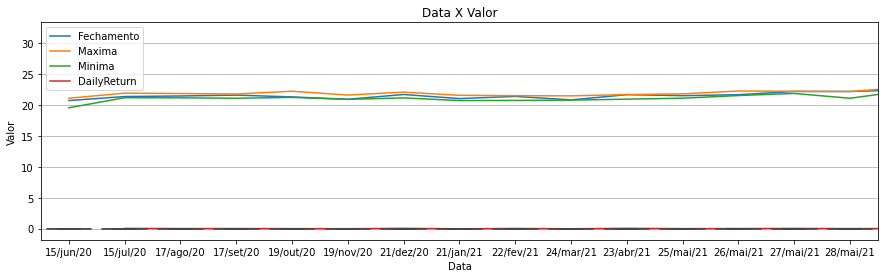

In [22]:
petr4[['Fechamento','Maxima', 'Minima','DailyReturn']].plot(figsize=(15, 4), title='Bovespa', grid=True)
sns.boxplot(x= 'Data' , y= "Valor", data = petr4M)# substituição de "Maxima" por "Valor"
 
plt.title("Data X Valor")



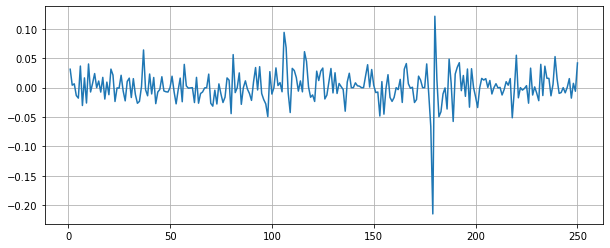

In [23]:
petr4.DailyReturn.plot(figsize=(10, 4), grid=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


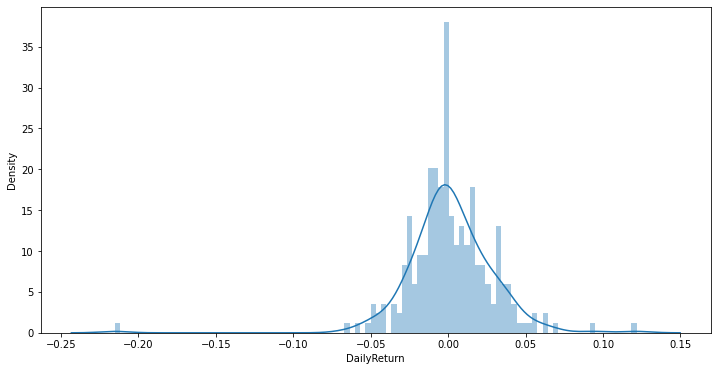

In [24]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
sns.distplot(petr4.DailyReturn.dropna(), bins=100, ax=ax1)